# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import shutil

In [9]:
df = pd.read_csv('fuel_conv.csv.csv')

:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it

In [38]:
print(df.head(12))

       id        make           model  year           VClass  \
0   32204      Nissan            GT-R  2013  Subcompact Cars   
1   32205  Volkswagen              CC  2013     Compact Cars   
2   32206  Volkswagen              CC  2013     Compact Cars   
3   32207  Volkswagen      CC 4motion  2013     Compact Cars   
4   32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5   32209       Lexus          GS 350  2013     Midsize Cars   
6   32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7   32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8   32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9   32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   
10  32217     Hyundai   Genesis Coupe  2013  Subcompact Cars   
11  32218  Volkswagen              CC  2013     Compact Cars   

                drive              trans          fuelType  cylinders  displ  \
0     All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1   Fro

In [ ]:
Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAl8AAADFCAIAAADlvwBGAAAgAElEQVR4Ae19f2wVV5Zmy38aupGQEGAgdr/ILfdbN1h68qwlaxXL1hhlLVktEUsewqC4HYmQEJju2AmJhBskeiLBglhFwy4jNmmBBKNhw4TxOE5oaDpOYiGx7UbdODiQYAkTG4/jkJg4hsfzq5VdSVGuqnNc95x773vtHMsiVefe73zf/W5VfX7PP/IDRz7EAXFAHBAHxAFxYK4DP5h7KmfigDggDogD4oA44Eg6ykUgDogD4oA4IA4EHZB0DDoi5+KAOCAOiAPigKSjXAPigDggDogD4kDQAUnHoCNyLg6IA+KAOCAOSDrKNSAOiAPigDggDgQdkHQMOiLn4oA4IA6IA+KApKNcA+KAOCAOiAPiQNABScegI3IuDogD4oA4IA6w0nH9+vXioDggDogD4oA4sPAcYKVjKpVaeI7IisQBcUAcEAfEAUlHuQbEAXFAHBAHxIGgA5KOQUfkXBwQB8QBcUAckHSUa0AcEAfEAXFAHAg6IOkYdETOxQFxQBwQB8QBSUe5BsQBcUAcEAfEgaADko5BR+RcHBAHxAFxQByQdJRrQBwQB8QBcUAcCDog6Rh0RM7FAXFAHBAHxAFJR7kGxAFxQBwQB8SBoAOSjkFH5FwcEAfEAXFAHNCfjgNvN+X5Z/aj1jz/FAOZG5TnBg683cRcoAW4eMg3WTzke5jDkJZ0zMekzPObin/Fm+6Q5wZKOmrZINNXEb+/lmUabcJfo+kOko5WX26a3k5+f6P3A785f4GmO/DXaLqDaQf4/U07wO/PX6PpDvw1mu5g2gF+f0lHScc5L2FN3xLM/vwr3nQH5gItwE07wO9vwQQmBX+NpjswF2gBbtoBfn9JR0lHScc5DjBvKguPFSYFc4EW4MwFWoBbMIFJYcEEJgVzgRbgko6SjnOygXnFm4ZbuCWYFKYd4PdnLtACnL9G0x0smMCkMO0Avz9zgRbgko6SjpKOcxxg3nX8p4bpDswFWoCbdoDf34IJTAr+Gk13YC7QAlzSUdJxTjaYviWY/S3cEkwK5gItwJkLtAC3YAKTwoIJTArmAi3AmQu0AJd0lHSUdJzjAPOus/BYYVIwF2gBzlygBbgFE5gUFkxgUjAXaAEu6SjpOCcbmFe8abiFW4JJYdoBfn/mAi3A+Ws03cGCCUwK0w7w+zMXaAEu6SjpKOk4xwHmXcd/apjuwFygBbhpB/j9LZjApOCv0XQH5gItwCUdJR3nZIPpW4LZ38ItwaRgLtACnLlAC3ALJjApLJjApGAu0AKcuUALcElHSUdJxzkOMO86C48VJgVzgRbgzAVagFswgUlhwQQmBXOBFuCSjpKOc7KBecWbhlu4JZgUph3g92cu0AKcv0bTHSyYwKQw7QC/P3OBFuCSjpKOko5zHGDedfynhukOzAVagJt2gN/fgglMCv4aTXdgLtACXNJR0nFONpi+JZj9LdwSTArmAi3AmQu0ALdgApPCgglMCuYCLcCZC7QAl3SUdJR0nOMA866z8FhhUjAXaAHOXKAFuAUTmBQWTGBSMBdoAS7pKOk4JxuYV7xpuIVbgklh2gF+f+YCLcD5azTdwYIJTArTDvD7MxdoAS7pKOko6TjHAeZdx39qmO7AXKAFuGkH+P0tmMCk4K/RdAfmAi3AJR0lHedkg+lbgtnfwi3BpGAu0AKcuUALcAsmMCksmMCkYC7QApy5QAtwSUdJR0nHOQ4w7zoLjxUmBXOBFuDMBVqAWzCBSWHBBCYFc4EW4Arp+PXkg/fey3z8sZPNgqhsNvPxxw/ee8/5+mtwzncDP/jugPLfVCoVhjF3ywLcwo4yKSyYwKFgrs4CnLM6O1gLJjAp7PjAYWEu0AKcszo7WAsmMCnCERNd+XoyffrfJn9YdO/FnTMBmclETMtkMteu33tx5+QPi9Kn/23egJR01PmShXkdeHA7NwaZxdOZtwfkpVkD5q11njBrVpCJPKl5e0BemjVg3lrnCYsIuajSxLlzUz9aNfnDoruLi77Z9euIgJyNxm92/fru4qLJHxZN/WjVxLlzUZ0e1iQdJR2V39b2Lty8PbD2cCET5a11njDy0qwBPal5e2DNCjJR3lrnCXsYVujRyJ/+dHvb9qkfrbq7OCogfdF4d/FMNN7etn3kT39CWzqSjpKOko7KDpAfRh7Qu/nz9sCTmrcHeWudJyxvrfOEeVLz9gAPMG80k8mM/eXK7bYX3XT8cvHKb3b9+v7VqzPfg5z9XuM3u3795eKVXy5eeXdx0e22F8f+ciUT+e6r19GRdPxI0lE5G/L2RvKEeTd/3h54UvP2IG+t84TlrXWeME9q3h54UvP2wJdW8xxmHzwY+8uVz9pfuru4yA3CifaXMteuZ65dn2h/yYvGz9pfGvvLleyDB/O0k3TMz2sib+8lV1h+muZXlecGDrzd5Febn8fiIX9fxEO+h/NmmH+C+wrys9ks/HzRys8Xrfxyxy+/3PHLb48Xr4wfjY6kI3/zTHTI85vKxJL19sxzAyUdtWyQ3mvGRDctyzTaxMSq9fb0h1+c4+yDB7f7+wf/4VduIvr/Hdzxy9v9/XFeNbpE8n1HeWdV3llVdoD/wNL7BDHRjb9G0x1MrFpvT9MO8PvrXa+JbnESMTAnm50evTpwe9v2z5cVjy5aMbpoxefLim9v2z56dSCbnQ5MRk4lHSUdlbPBxD2gtyf/qWG6g971muhm2gF+fxOr1tuTv0bTHfSu10Q3JL3AoWz2m48/vr1t++1lj9xetGLmc9kjt7dtnxxA/1BAqJ2ko6SjpKOyA/xnlonniN6e/DWa7qB3vSa6mXaA39/EqvX2DGXWPIVsJnP/6tWxF9pGFq0YdqNx9mBk0YqxF9ruX72ane9HVT0CSUdJR+Vs0Hv1m+jGf2qY7mBi1Xp7mnaA31/vek1046/RdAcTq9bb08uqOAfZBw+mrl79z5dfufVdIg5uffbGM8+6SXlr0Yr/fPmVqatXY37rUdJR0lHSUdkB/jNL7xPERDf+Gk13MLFqvT1NO8Dvr3e9JrrFCUV3TjaTcaPxZuHyW4tWjCxaMbjjl6NXB0avDgz+w69GFq24tWjFzcLl3wZkjFeQko6SjsrZYOIe0NuT/9Qw3UHvek10M+0Av7+JVevtyV+j6Q5612uiW9x0zGb90Ti8aMWNF1+a+QnV7HQ2O327v//Giy8Nzw1IZxr+Y+WzrJKOko6SjsoO8J9ZJp4jenvy12i6g971muhm2gF+fxOr1tszZjp+098/9kLbzcLl7gvHT3e+7P/lDffXPD7d+bL78vFm4fKxF9q+6e/Hm0s6SjoqZ4Peq99EN/5Tw3QHE6vW29O0A/z+etdroht/jaY7mFi13p54gHmjn7zz7s3C5e7bp+6rxsAfinMD8saLL7lvut4sXP7JO+968MgDSUdJR0lHZQf4zyy9TxAT3fhrNN3BxKr19jTtAL+/3vWa6BaZW+Hi1N27AydO3Jr9XqP/VaN/pveHAm4tWjFw4sTU3bv+0fCxpKOko3I2mLgH9PbkPzVMd9C7XhPdTDvA729i1Xp78tdouoPe9ZroFg4tqDJ19+6V7nc+u3IF+ZX/bHb6sytXrnS/M280yl+Sy8dozH7UavqWYPY3cQ/o7clcoAW43vWa6GbBBCaFiVXr7clcoAW43vWa6AZloYW6vHbMx4C0cFdwKEzcA3p7clZnB6t3vSa62fGBw2Ji1Xp7clZnB6t3vSa6WUhBiELSUdJR3llVdoD/5DLxHNHbk79G0x30rtdEN9MO8PubWLXenlB0WahLOko6KmeD3qvfRDf+U8N0BxOr1tvTtAP8/nrXa6Ibf42mO5hYtd6eFlIQopB0lHSUdFR2gP/M0vsEMdGNv0bTHUysWm9P0w7w++tdr4luUHRZqEs6SjoqZ4OJe0BvT/5Tw3QHves10c20A/z+Jlattyd/jaY76F2viW4WUhCikHSUdJR0VHaA/8wy8RzR25O/RtMd9K7XRDfTDvD7m1i13p5QdFmoSzpKOipng96r30Q3/lPDdAcTq9bb07QD/P5612uiG3+NpjuYWLXenhZSEKKQdJR0lHRUdoD/zNL7BDHRjb9G0x1MrFpvT9MO8PvrXa+JblB0WahLOko6KmeDiXtAb0/+U8N0B73rNdHNtAP8/iZWrbcnf42mO+hdr4luFlIQopB0lHSUdFR2gP/MMvEc0duTv0bTHfSu10Q30w7w+5tYtd6eUHRZqEs6SjoqZ4Peq99EN/5Tw3QHE6vW29O0A/z+etdroht/jaY7mFi13p4WUhCikHSUdJR0VHaA/8zS+wQx0Y2/RtMdTKxab0/TDvD7612viW5QdFmoSzpKOipng4l7QG9P/lPDdAe96zXRzbQD/P4mVq23J3+NpjvoXa+JbhZSEKKQdJR0lHRUdoD/zDLxHNHbk79G0x30rtdEN9MO8PubWLXenlB0WahLOko6KmeD3qvfRDf+U8N0BxOr1tvTtAP8/nrXa6Ibf42mO5hYtd6eFlIQopB0lHSUdFR2gP/M0vsEMdGNv0bTHUysWm9P0w7w++tdr4luUHRZqEs6SjoqZ4OJe0BvT/5Tw3QHves10c20A/z+Jlattyd/jaY76F2viW4WUhCiwNKxu7u7tLQ0kUi8+uqrkfhUKhWum95Ofn8TW6i3J3+NRjvoXayJbkaXr6W5iVXr7allmUab6F2viW5Gl6+luYlV6+0ZjhhrFTAdM5lMIpG4cePG/fv3165d29/fH9Yk6aj3OvC6abnuzTXxdObtgbm16+qct9Z5wnSt1FwfT2reHphbu67OeWudJyycO9YqYDr29vbW19e7Ov5x9iOsSdLR20K9B7oufUN99C7WRDdDC9fY1sSq9fbUuFhDrfSu10Q3QwvX2NbEqvX2DOeOtQqYjqdOnWptbXV1HDt27LnnnvM0HTlyJDX7UVhY6B74/y0uLvaf5uGxKGRuihjINDCVSomH4iHfAX6HhXEdrl+/3osnjQdx03Hbtm0xWSNfUMbE2pkmCpk+i4FMAx3HEQ/FQ74D/A5yHSIegukY553VyL5id6QtSsU89zDP5Un2KF1s0GTZZciZ+HXxML5X0MwcegimYzqdLikpwX8qJ3I9OVxMpJ5wURSGPVGqiIFKdkVOFg8jbVEqiodKdkVOFg8jbXGLYDo6jtPV1eX+RsfevXuRFoGhI0eOBCr5dioKmTsiBjINdBxHPBQP+Q7wO8h1iHiIpSMCkyFxQBwQB8QBcWABOyDpuIA3V5YmDogD4oA4QHRA0pFonMDEAXFAHBAHFrAD3HSE/trcvXv3mpqaEolEZWXl4OBgDh3MZDIVFRUNDQ1+DQcOHCgrKysvL6+trc2tvIMHDyZnP5qbm6empvwiHcc5depUQUHBpUuXAnXTpy0tLcuWLUsmky5RW1uba1djY+OdO3cC7Hfu3NmwYUPZ7Edvb29g1NBpQKHjOK+99lppaWkymWxvbw+Q4iYHJus6HRoaqqmpKSsrSyaThw4dcnczmUxCGwrdSrr0hPuEFXZ0dBQVFa2b/ejq6vJDwpP9o4aOw6SXL1+uqqoqLy9vaGj46quvwryR93t4mq7K1NRUZWXl2rVrk8lkR0eH4zgtLS1r164tLy/fsGHDxMREgMjVn0wmy8vLw/d7YDL/NCyvurra3d+ioqLGxsYARXt7ezKZLCsr27ZtWzY7HRg1d+rftY0bN7o3cktLSzqdDpC+8cYbpbMfb7zxRmBI+ykrHZG/Nnf48OEtW7Y4jnPy5MmmpibtuuM3PHDgQHNzcyAdz58/Pzk56TjO4cOHcyjv1q1bJSUlrpKmpqbAfk9MTFRXV1dVVdlPx56enr6+Pi8dz549616m7bMfAfM3b9589OhRx3Hu378fzs7AZF2nAYXnz5+vq6u7d++e4zijo6N+Ftxk/0y9x8PDw319fY7jTExMlJaW9s9+DAwMPPbYY+ENRW4lvar83cIKOzo69u/f75/jHYcne0PmDsKkqVTqwoULjuMcPXp0165dYerI+z08TVclm512IzCdTldWVvb29nqZvWPHjsBfqE6n0+Xl5ZcvX3YcZ2xsLJPJ6JIB9QnL82Zu2LDh2LFj3qnjOB9++GF1dXVm9qOqqsr12T/B3LF/17q6urLZ6Wx2urm5+fDhw37S8fHxkpKS8dkP98A/qv2YlY7I70TW19e7LyPS6fTSpUttfhni92hoaKi2tvb8+fOBdPTm9PX1VVdXe6eWD27durV69erx8fF0Ot3Q0HD27Fm/gB07dnR2dkY+TP3TDB0PDg566ehRnD59euPGjd6p4zhfffVVSUlJTvbXr7CpqSngnicSN9mbZvSgsbHRkxe5ocitZFSY19xViKSjN9NxHP9y/HWjxy7pkiVL3IttaGiorKwswDjv/R6Yr/F0cnKyoqLi4sWLbs9sdnrLli2BdOzq6nryySc1ksZvFZA3MTGxZMkSL8jdPr29valUanL2I5VKRf5t7fiM8WdCu3bw4MFXXnnF3+fEiRPuiy7HcbZs2XLixAn/qPZjVjoif20umUwODQ25chOJxNjYmHbpcRpu2LDh0qVLFy5cgNLxueeeU/p9lTikSnMOHTpUWFi4bNmyQOr09fVt2LDBcZzIh6kSBW2yP3u8Dg0NDcePH/dOHcfp6+urrKzcvHlzRUVFa2vr119/7R81euxXuG7duo6OjsrKyki7IJONyvOaDw4OrlmzxnsSRSpEbiWvj7kDT2FHR0dxcXF5eXlLS8v4+Hgkozc5ctRQ0SOtqqo6c+aM4zgHDhwoLCwM0M17vwfmaznNZDLr1q0rLCz03tJ33/avqalx3xbyWA4ePLhp06b6+vqKiop9+/Z5daMHYXmO4xw7dsx9vASo29ralsx+BGIpME3vaeSupdPpioqKnp4eP9f+/fu9x/WePXug9zn8EM6xznT0/7W5fEjHzs7OrVu3Oo4DpePx48erqqrct+M4JpKx4+PjNTU1o6Oj6XS6sbHRC55sdvqxxx5zvyEa+TAlM8YH+rPHRe3du7exsTHwMvHSpUsFBQXul8w7duyIfLMrPqnSTL/CZDLpfqfk4sWLgdeykMlKXOTJExMTqVTqzTff9DpEbmggHf23kgc0dOBXODo6mslkstnpV155paWlJczonxweNVTxk169erW+vj6VSu3evXvp0qV+xnnvd/9k7cd37typqan585//7HbOZDJbt24NfK9k//79JSUlY2Njk5OTVVVV58+f1y4DahiQt379+lOnTgUmX79+/fHHH5+Y/aiqqgokU2CyrlNo11pbW3fs2BFg2bdv319NOiJvB+XDO6s7d+4sKioqLi5evnx5YWFh4D2Ns2fPlpWVBb5HFdgM06enTp3ynkHHjh1zs9xxnDt37ixdurR49qOwsLCoqCj8nSrT2vzZ4zjOG2+8UVVVFfha2HGc4eHh4uJiV0xPT8/jjz9uWpjX369w/fr13rdJEomEf1shk70+5g7S6XR9ff2BAwf8FJHpiNxKfqz240iFjuP4vfVIocneBBMHEOnAwEBlZaWfEb/f/TMNHe/evdv/aib8RfnJkyc3b97ssu/Zs8fay0eX0ZM3Nja2dOnS8M8E7du3b8+ePZblRe7a7t27w1+IO47z1/TOKvLX5l577bU8+amcyNeOfX19iUTi2rVrhu6TmG0vXryYTCYnJyez2enNmze/9tprYWDkwzQ8TXvF/3zs7u5GvpKorq4eGBhwHKejo6OtrU27EqihX+Hhw4fdl60DAwOrV6/2v8CNYzJEwalns9ObNm0Kf/0buaHIrcTRgGPDCoeHh13IwYMHm5ub/fDwZP+ooeMwqft1j1t3fxYsTB2OpfAcXZXR0VH3J9EmJyerq6vPnDlz/fp1x3Gy2em22Q8/0fj4eEVFxeTkZDqdrqur6+zs9I+aOA7IcxkPHz7shbSf9OTJk3V1denZj9raWvcdbP8Eo8ferh09ejTyC3HHcf6afion/Nfmdu3a5Xo6NTX1xBNPuL/RcePGDaO2ztvc892TV1dXt2zZMvcnm8M/1jxvQ40TOjo63B/637Rp07179zyFHkXkw9QbNXTQ3Ny8fPnygoKCoqKio0ePJhKJ1atXu3a5X/R89tln3svEvr6+VCpVXl7e2NgIfbNKu86Awvv37z/55JPJZLKiosJ9w8qvMGCydjGRDXt6egoKCsrLy13furq6Tp8+XVRUVFBQsGzZMvd/nuoXSfvDjZHUMYthhZs2bSqf/WhsbHST0lMYnhyThTMtTHro0CH3B/p37tzpfg3kKfSIvPvdq5g7uHz5ckVFRXl5eTKZ3LNnTzY7XV1d7Z5u3LjR/WbzmTNnvO84HD9+3P0NLu+blOa0OY4TkOdyPfbYY93d3R7vpUuX3P9ZYSaT2bJli/urWeGv6rz5hg68XSsoKEgkEu5d476W9RS6P6ucmP0IvGttQhXr+44mBElPcUAcEAfEAXEg5w5IOuZ8C0SAOCAOiAPiQN45IOmYd1sigsQBcUAcEAdy7oCkY863QASIA+KAOCAO5J0Dko55tyUiSBwQB8QBcSDnDrDScf369TlfgAgQB8QBcUAcEAe0O8BKx1QqpV2QNBQHxAFxQBwQB3LugKRjzrdABIgD4oA4IA7knQOSjnm3JSJIHBAHxAFxIOcOSDrmfAtEgDggDogD4kDeOSDpmHdbIoLEAXFAHBAHcu6ApGPOt0AEiAPigDggDuSdA5KOebclIkgcEAfEAXEg5w5IOuZ8C0SAOCAOiAPiQN45IOmYd1sigsQBcUAcEAdy7oCkY863QASIA+KAOCAO5J0Dko55tyUiSBwQB8QBcSDnDuhPx4G3mzR+Zj9q1fWpUdXA2026VGU/as1bYXq1aXRMrzDZTcIVKLu5kEzL593MYUZKOhKzXOP1RLjNEIhGYXpDKG+FSToilxM0JLsJOYPU89a0vBU28HaTpCMYURq3DblqCUPfB2GSjoRdJlxLCIQgAIEgRKpDCAthSJUdn08QAEFwItVRiIVWV2VH5tMEQCiEiDAk6SjpCDqgej1BlyytrsqOzKcJgFAIEWEIYiHUCewIhCAAgSBEqkMIC2FIlR2fTxAAQXAi1VGIhVZXZUfm0wRAKISIMCTpCGYDtAGEOmFjEAhBAARBWAhDEAutThAAQWgCIBTEQqtDLIQ6TQCEIghAIBALoY6wEIYIAhAIQQAEQVgIQxALrU4QAEFoAiAUxEKrSzpKOoIOqF5S0CVLq6uyI/NpAiAUQkQYglgIdQI7AiEIQCAIkeoQwkIYUmXH5xMEQBCcSHUUYqHVVdmR+TQBEAohIgxJOoLZAG0AoU7YGARCEABBEBbCEMRCqxMEQBCaAAgFsdDqEAuhThMAoQgCEAjEQqgjLIQhggAEQhAAQRAWwhDEQqsTBEAQmgAIBbHQ6pKOko6gA6qXFHTJ0uqq7Mh8mgAIhRARhiAWQp3AjkAIAhAIQqQ6hLAQhlTZ8fkEARAEJ1IdhVhodVV2ZD5NAIRCiAhDko5gNkAbQKgTNgaBEARAEISFMASx0OoEARCEJgBCQSy0OsRCqNMEQCiCAAQCsRDqCAthiCAAgRAEQBCEhTAEsdDqBAEQhCYAQkEstLqko6Qj6IDqJQVdsrS6KjsynyYAQiFEhCGIhVAnsCMQggAEghCpDiEshCFVdnw+QQAEwYlURyEWWl2VHZlPEwChECLCkKQjmA3QBhDqhI1BIAQBEARhIQxBLLQ6QQAEoQmAUBALrQ6xEOo0ARCKIACBQCyEOsJCGCIIQCAEARAEYSEMQSy0OkEABKEJgFAQC60u6SjpCDqgeklBlyytrsqOzKcJgFAIEWEIYiHUCewIhCAAgSBEqkMIC2FIlR2fTxAAQXAi1VGIhVZXZUfm0wRAKISIMCTpCGYDtAGEOmFjEAhBAARBWAhDEAutThAAQWgCIBTEQqtDLIQ6TQCEIghAIBALoY6wEIYIAhAIQQAEQVgIQxALrU4QAEFoAiAUxEKrSzpKOoIOqF5S0CVLq6uyI/NpAiAUQkQYglgIdQI7AiEIQCAIkeoQwkIYUmXH5xMEQBCcSHUUYqHVVdmR+TQBEAohIgxJOoLZAG0AoU7YGARCEABBEBbCEMRCqxMEQBCaAAgFsdDqEAuhThMAoQgCEAjEQqgjLIQhggAEQhAAQRAWwhDEQqsTBEAQmgAIBbHQ6pKOko6gA6qXFHTJ0uqq7Mh8mgAIhRARhiAWQp3AjkAIAhAIQqQ6hLAQhlTZ8fkEARAEJ1IdhVhodVV2ZD5NAIRCiAhDko5gNkAbQKgTNgaBEARAEISFMASx0OoEARCEJgBCQSy0OsRCqNMEQCiCAAQCsRDqCAthiCAAgRAEQBCEhTAEsdDqBAEQhCYAQkEstLqko6Qj6IDqJQVdsrS6KjsynyYAQiFEhCGIhVAnsCMQggAEghCpDiEshCFVdnw+QQAEwYlURyEWWl2VHZlPEwChECLCkKQjmA3QBhDqhI1BIAQBEARhIQxBLLQ6QQAEoQmAUBALrQ6xEOo0ARCKIACBQCyEOsJCGCIIQCAEARAEYSEMQSy0OkEABKEJgFAQC60u6SjpCDqgeklBlyytrsqOzKcJgFAIEWEIYiHUCewIhCAAgSBEqkMIC2FIlR2fTxAAQXAi1VGIhVZXZUfm0wRAKISIMCTpCGYDtAGEOmFjEAhBAARBWAhDEAutThAAQWgCIBTEQqtDLIQ6TQCEIghAIBALoY6wEIYIAhAIQQAEQVgIQxALrU4QAEFoAiAUxEKrx0zHbHZ6ZHzkZM+/tJ3eueX/bkM+207vPPnBv4yMj2Sz03jzH+DD+GgqlQpPoFkAoaANINQhClqdIACC0ARAKIiFVodYCHWaAAhFEIBAIBZCHWEhDBEEIBCCAAiCsBCGIBZanSAAgtAEQCiIhVaHWAh1mgAIRRCAQMIRE1kZ/nz4V53tP//gqZev/abjk/3I56iJ5DAAABFpSURBVMvXfvPzD576VWf78OfDka28oqQj+LIV2bCBt5ugK4NQx4lURwkCEIgqOzIfYSEMIUSEIYIACEJgRyAQC62OEKkO0QRAKFV2fD7EQqjjRKqjBAEIRJUdmY+wEIYQIsKQl1X4wW/fP1bd07D905fxzxeud7xwvWP7py9X9zT89v1jeE9JR0nHVuQGIFzNEARhIQxBLLQ6QQAEoQmAUBALrQ6xEOo0ARCKIACBQCyEOsJCGCIIQCAEARAEYSEMQSy0Oh5g3ujzXdv/5tLf1l3++X/ra4j8rLv8870f/483h956+dpv6i7//G8u/e0znc968MgDSUdJR0lHeSdA+S4gPDQRCO25CaEQItUhiIJWV2XH59M0RKJwItXRSApyMTK3wsWn/qP10d51yOeGvr+7fveT63c/ear/GXdaS1druI+/Iumo/Fxwt1n1ikHmk6+bSCBCRBiKpKAVCewIhKYBQiFEqkMQBa2uyo7Pp2mIROFEqqORFOSiKjsyn6whEogQEYYiKWhFAjsCoWmAUP64Qo5bO59e895Poj//8OhP3vsvv/30+J30l//z1uGfvv8zd1pr59NIQ8dxJB0lHeW1o7x2VL4LkIcjYQh6MtLqBAEQhCYAQkEstDrEQqjTBEAoggAEggeYNzqTjn94dM0fHl19IbH6QsI9/rZyruTv/9jyxdQXf/yir/b/rfdGJR0fPvqRDSAMQVcGoU5gRyAEAQgEIVIdQlgIQ6rs+HyCAAiCE6mOQiy0uio7Mp8mAEIhRIQhiIVQJ7AjEIIABIIQqQ4hLIQhVXZ8vpd/+EHrmadX//7Ha/7waOn5suJzjxafe3T17388k5TnSkrPl304/OHI1MiLH+98WP/9j1vPyGvHj74NSHwPVEcJFw0EUaXG50MstDrOpTRKEwChlKjnnQyxEOrzcilNIAhAIErU+GSEhTCEc6mOEgRAEFVqfD7EQqvjXEqjNAEQSol63sl4KHqjM+l4ruSn7//sn67904fDH/79H1tmgvBcyaru4vY/vzg1PdU99s5P3//Z6nMl3qeko7x2fOgAdDUj9Xmv3fgTEBbCUHzeODMJAiBIHLr4cyAWWj0+77wzaQIg1Lx0ShMgFkJdiXfeyQQBCGReuvgTEBbCUHzeODO9/MMPWs88vepscfG5R5+/sn38wfgfv+ir+aB2VXfx2t9VjEyNjEyNbOj7u1XdxV40rj5XIun4MBvi7ET8OYSLBoLEJ40zE2Kh1eMwxpxDEwChYpLGnAaxEOoxGWNOIwhAIDFJ40xDWAhDcRjjzyEIgCDxSePMhFho9TiMMefQBEComKQxp+Gh6I22nn561bvFq94tLj1fduTmP09NT70++Pra31X8r2v/O5PJHLn5zzOj78xMmPk8O/Nv62l5Z1XeWf3OAehqRuoxr+A40xAWwlAcxvhzCAIgSHzSODMhFlo9DmPMOTQBEComacxpEAuhHpMx5jSCAAQSkzTONISFMBSHMf4cL//wg5l07J7Nv+7img9qe8Z7RqZGfvvp8S+mvrh+95PKnv9a1PXITDq6n+8Wr+qWdPQFQ/z9iDOTcNFAkDh08edALLR6fN55Z9IEQKh56ZQmQCyEuhLvvJMJAhDIvHTxJyAshKH4vHFmEgRAkDh08edALLR6fN55Z9IEQKh56ZQm4KHojbaefnom/7qL3X+fv7J9ZGrEmc5OTU89f2V7UefMkP+zqOsRee0o76w+dAC6mpG60nWMT0ZYCEM4l+ooQQAEUaXG50MstDrOpTRKEwChlKjnnQyxEOrzcilNIAhAIErU+GSEhTCEc6mOevmHHzz1r08VdT5S1PXIzL+dj/zknZ++Pvj61PRU1+23E2+XusWH/85Oe+pfn8J7yu87Kv+ml7u7hIsGgqheLvh8iIVWx7mURmkCIJQS9byTIRZCfV4upQkEAQhEiRqfjLAQhnAu1VGCAAiiSo3Ph1hodZxLaZQmAEIpUc87GQ8wb3TLqWcehl/nIyvfWlPzQe2bQ2/9996GlafX+Ie84y2nnvHgkQeSjpKO2IvLea/d+BOge4lWj88bZyZNQyQqDl38OZEU5GJ83nlnkjVEAuelU5oQSUErKvHOO5mmAULNSxd/AkRBq8fnjTMzMrfCxaPvHf02Bc+sKTqzZuVbM4m49ncVRbNJWTRbfPhv5yMrT685+t7RcB9/RdJR0lHSUf5WjvJdQHtuQqg4T8n4cyAWQj0+aZyZBAEIJA5jzDkIC2EoJmnMaf64Qo5vjt18pvPZmYD8LghXvrVm5enZmPyu8nDo9JpnOp+9OXYTaSh/SU75oeDtKOGigSBeTy0HEAutrkWS24QmAEJpFCb/PzKCmdC+0OoEAQiEpiEShbAQhiIpyEWCAAhC1hAJhFhodTzAvNFsdvrm2M3Xe19/vmv7L/79F7/491+0dj4d+HTrz3dt/z8fvH5z7Kb8348fvjCi7Q2EirwsaEWIglanaYBQNA2RKIiCVo+kIBdpGiJRZA2RwEgKcjGSglYka4gE0jRAqEgKWhGioNVpGiAUTUMkCqKg1SMpyEUv/+wfyDurxJePtOsmEkW+biKBkRTkYiQFrUjWEAmkaYBQkRS0IkRBq9M0QCiahkgUREGrR1KQizQNkSiyhkhgJAW5GElBK5I1RAJpGiCU/VD0GCUdJR0fvrwOX+vQJUuoh5tzKgQBCISjJIBFWAhDgebMU4IACMJUEoBDLLR6oDnnlCYAQnGUhLEQC6Eebs6pEAQgEC+r7B9IOko6SjrKT+Uo3wWcp2cYizwcCUPh/uQKgR2BkGVEAhEi1aHI/uSiKjs+334oeoySjsrPBXcvyZdOGIhfHKqj4f6ciio7Mp8jI4xFiAhD4f7kCoEdgZBlRAIRItWhyP7koio7Pp8sIwzEiVRHw/05FVV2ZD5HRhiLEBGGvKyyfyDpKOkorx3ltaPyXRB+JnIqhIcmAuEoCWARFsJQoDnzlCAAgjCVBOAQC61uPxQ9RklH5eeCu8eBC4JzSrtoIBRHSRgLsRDq4eacCkEAAuEoCWARFsJQoDnzlCAAgjCVBOAQC60eaM45pQmAUBwlYSzEQqiHm3MqBAEIxMsq+weSjpKO8tpRXjsq3wWcp2cYizwcCUPh/uQKgR2BkGVEAhEi1aHI/uSiKjs+334oeoySjsrPBXcvyZdOGIhfHKqj4f6ciio7Mp8jI4xFiAhD4f7kCoEdgZBlRAIRItWhyP7koio7Pp8sIwzEiVRHw/05FVV2ZD5HRhiLEBGGvKyyfyDpKOkorx3ltaPyXRB+JnIqhIcmAuEoCWARFsJQoDnzlCAAgjCVBOAQC61uPxQ9RklH5eeCu8eBC4JzSrtoIBRHSRgLsRDq4eacCkEAAuEoCWARFsJQoDnzlCAAgjCVBOAQC60eaM45pQmAUBwlYSzEQqiHm3MqBAEIxMsq+weSjpKO8tpRXjsq3wWcp2cYizwcCUPh/uQKgR2BkGVEAhEi1aHI/uSiKjs+334oeoySjsrPBXcvyZdOGIhfHKqj4f6ciio7Mp8jI4xFiAhD4f7kCoEdgZBlRAIRItWhyP7koio7Pp8sIwzEiVRHw/05FVV2ZD5HRhiLEBGGvKyyfyDpKOkorx3ltaPyXRB+JnIqhIcmAuEoCWARFsJQoDnzlCAAgjCVBOAQC61uPxQ9RklH5eeCu8eBC4JzSrtoIBRHSRgLsRDq4eacCkEAAuEoCWARFsJQoDnzlCAAgjCVBOAQC60eaM45pQmAUBwlYSzEQqiHm3MqBAEIxMsq+weSjpKO8tpRXjsq3wWcp2cYizwcCUPh/uQKgR2BkGVEAhEi1aHI/uSiKjs+334oeoySjsrPBXcvyZdOGIhfHKqj4f6ciio7Mp8jI4xFiAhD4f7kCoEdgZBlRAIRItWhyP7koio7Pp8sIwzEiVRHw/05FVV2ZD5HRhiLEBGGvKyyfyDpKOkorx3ltaPyXRB+JnIqhIcmAuEoCWARFsJQoDnzlCAAgjCVBOAQC61uPxQ9Riwdu7u7S0tLE4nEq6++6gH8B6lUyn/qHtMsgFAB3zmnEAWtzlESwNIEQKhAc+YpxEKoM5UE4AQBCCTQnHOKsBCGOErCWIIACBJuzqlALLQ6R0kASxMAoQLNmacQC6HOVBKAEwQgkHDEWKuA6ZjJZBKJxI0bN+7fv7927dr+/v6wJknHwGVBO0WuDMIQTQOEIgiAIBAFrQ6x0Oo0DZEomgAIFUlBLkIshDpZQySQIACBRFLQiggLYYimAUIRBEAQiIJWh1ho9XDuWKuA6djb21tfX+/q+MfZj7AmSUfa1RNA0S4aCBVozjyFWAh1ppIAnCAAgQSac04RFsIQR0kYSxAAQcLNORWIhVbnKAlgaQIgVKA58xRiIdSZSgJwggAEEs4daxUwHU+dOtXa2urqOHbs2HPPPedpOnLkSGr2o7Cw0D3w/1tcXOw/lWPLDoj/lg0P0In/AUPsn8oW2Pfcz2jf//Xr13vxpPEgbjpu27YtJmvkC8qYWJnGd0D853vI6SD+c9zTgpUt0GIjucmC8R9MxzjvrEbat2CsiVxd/hfF/9zukfifW/8dx5EtyO0WLBj/wXRMp9MlJSX4T+VE7sGCsSZydflfFP9zu0fif279l3QU/3U5AKaj4zhdXV3ub3Ts3bs3Pt+RI0fiT5aZ2h0Q/7VbqtRQ/Feyy8Rk2QITrsbvuWD8x9Ixvh0yUxwQB8QBcUAcWEgOSDoupN2UtYgD4oA4IA7ocUDSUY+P0kUcEAfEAXFgITmgMx3n/ctzC8m4/FlLS0vLsmXLksmkK2l8fLyurq60tLSurm58fDx/dC5UJUNDQzU1NWVlZclk8tChQ47jyBbY3OupqanKysq1a9cmk8mOjg7HcW7cuFFZWVlaWtrU1HT//n2bYr63XJlMpqKioqGhYSH5ry0d4/zlue/tpWN04T09PX19fV46tre3u38X99VXX21vbzdKLc0dxxkeHu7r63McZ2JiorS0tL+/X7bA5oWRzU5PTEw4jpNOpysrK3t7e5uamk6ePOk4zpYtWw4fPmxTzPeW68CBA83NzW46Lhj/taUj+fcjv7fXk8aFDw4OeulYWlo6PDzsPrVLS0s1skireR1obGw8e/asbMG8RpmYMDk5WVFRcfHixaVLl6bTacdx/A8lE4zS03VgaGiotrb2/PnzDQ0N2ez0gvFfWzoif3lOriHTDvjTccmSJR6d/9gryoEhBwYHB9esWfPVV1/5bfcfG+KVtplMZt26dYWFhe3t7WNjY4lEwvVkaGjI+6pRXDLnwIYNGy5dunThwoWGhoaF5L+pdIz/l+fM7dn3p7OkY873emJiIpVKvfnmm47j+BPRf5xzkQtbwJ07d2pqanp6evzpWF5evrBXnfPVdXZ2bt261XEcNx1HR0cXjP/a0tH/Jgb0//TI+UYuVAH+dJS39ezvcjqdrq+vP3DggEstW2B/C1zG3bt379u3b8G8s5crG5V4d+7cWVRUVFxcvHz58sLCwo0bNy4Y/7WlI/kvzynthEyOdMCfjm1tbfJTOZEuGSpms9ObNm3asWOH11+2wLPCwsHo6OidO3ccx5mcnKyuru7s7HziiSfkp3IsOB+gcF87Oo6zYPzXlo7kvzwXsFhOVR1obm5evnx5QUFBUVHR0aNHx8bGamtrS0tLa2tr5Tc6VM0kzO/p6SkoKCgvL183+9HV1SVbQLCRDLl8+XJFRUV5eXkymdyzZ4/3GwWJROKJJ564d+8eubMAlRzw0tH9jZoF4L/OdFSyUiaLA+KAOCAOiAN564CkY95ujQgTB8QBcUAcyJkDko45s16IxQFxQBwQB/LWAUnHvN0aESYOiAPigDiQMwckHXNmvRCLA+KAOCAO5K0Dko55uzUiTBwQB8QBcSBnDkg65sx6IRYHxAFxQBzIWwckHfN2a0SYOCAOiAPiQM4c+P+lrYcJwvjKEwAAAABJRU5ErkJggg==)

In [ ]:
Description The dataset has a number of different statistics that describe fuel efficiency.

TO DO:

create a histogram that depicts the distribution of carbon Dioxide
Play around with different bin width sizes to see what best depicts the data
Create 2 more histograms based on columns of your choice

0    471
1    349
2    429
3    446
4    310
5    393
6    412
7    432
8    375
9    461
Name: co2, dtype: int64


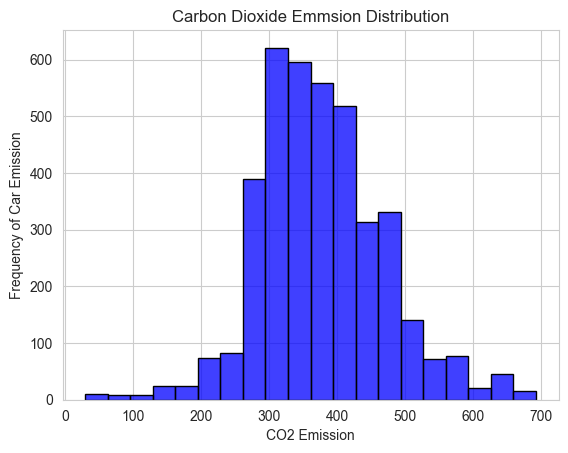

In [60]:
print(df['co2'].head(10))
co2_emission=df['co2']

sn.set_style('whitegrid')
sn.histplot(data=co2_emission,color='blue',edgecolor='black',bins=20)
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency of Car Emission')
plt.title('Carbon Dioxide Emmsion Distribution')
plt.savefig('co2_Distribution.png')
plt.show()

Interpretation

The histogram describes the distribution of carbon dioxide emissions between vehicles in the fuel_econ.csv.csv dataset. As you can see, the CO2 emission frequency can rise to 600 when the carbon is between 300 and 400.


In [18]:
!mkdir chart_1

In [ ]:
Interpretation

0    30.1798
1    42.4936
2    35.1000
3    33.5000
4    51.8816
5    38.5000
6    36.2109
7    37.6731
8    41.8000
9    34.4972
Name: UHighway, dtype: float64


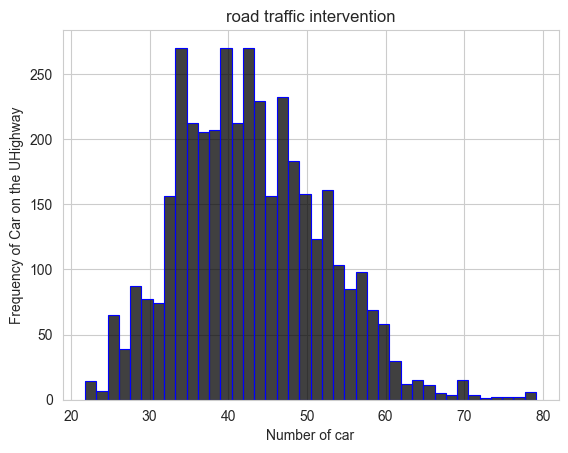

In [59]:
print(df['UHighway'].head(10))
car=df['UHighway']


sn.histplot(data=car,color='black',edgecolor='blue',bins=40)
plt.xlabel('Number of car')
plt.ylabel('Frequency of Car on the UHighway')
plt.title('road traffic intervention')
plt.savefig('trafic intervention.png')
plt.show()

Interpretation

The histogram represents the e frequency of car as a function of the capacity of the HHighway to receive them. So as you can see the trafic is not stable we have some hig trafic some time differently of hours 


In [39]:
numeric_columns = df.select_dtypes(include=['number'])

In [40]:
corr_matrix = numeric_columns.corr()

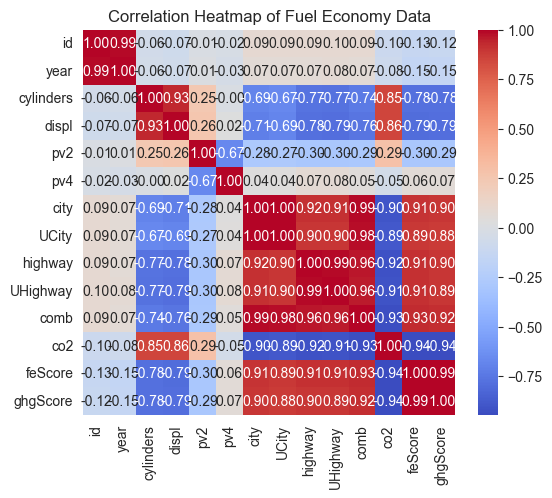

In [43]:
plt.figure(figsize=(6, 5))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Fuel Economy Data')
plt.savefig('heatmap.png')
plt.show()


Interpration

As you can see, there is a link between the motorway and the city, which means that when the city is full, the motorway is also impacted, which explains these red spots.

 Columns to drop

Assuming that the ‘ghgScore’ is the target variable, the columns that have a high correlation with the ‘ghgScore’ make things complicated and don't give any more information, so in this case I see one column that can be deleted out of all of them. I could say the column, ‘CO2’, 